In [ ]:
!pip install -q rasterio

     |████████████████████████████████| 19.3 MB 1.4 MB/s 


In [ ]:
# Bibliotecas 
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
# Lendo imagem como array
src = rio.open('/content/L71221071_07120010720_DN.tif')
b1 = src.read(1)
b2 = src.read(2)
b3 = src.read(3)
b4 = src.read(4)
b5 = src.read(5)
b7 = src.read(6)

img = np.dstack([b1,b2,b3,b4,b5,b7])

In [ ]:
# Lendo classes
with rio.open('/content/roi.tif') as src2:
  roi = src2.read(1)

In [ ]:
# Criando conjunto de treino
X = img[roi > 0]
y  = roi[roi > 0]

In [ ]:
# Dividindo conjunto em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size = 0.3)

In [ ]:
# Instanciando modelo
svm = SVC()

svm.fit(X_train, y_train)

SVC()

In [ ]:
# Criando matriz com bandas em colunas
img2d = img.reshape(img.shape[0]*img.shape[1], img.shape[2])

In [ ]:
# Rodando predição
pred_svm = svm.predict(img2d)

# Retornando para o formato original
pred_svm_final = pred_svm.reshape(img[:,:,0].shape)

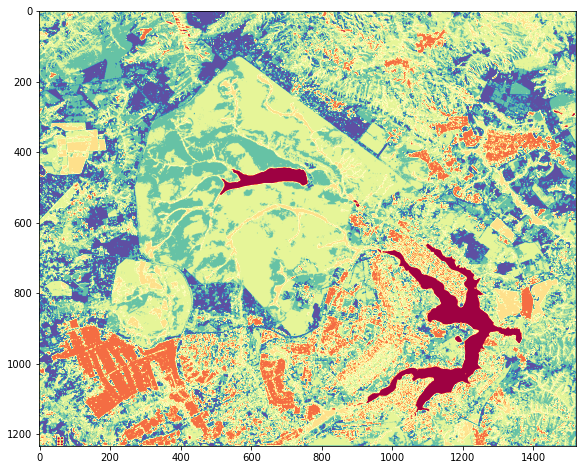

In [ ]:
# Visualizando
plt.figure(figsize=(12,8))
plt.imshow(pred_svm_final, cmap='Spectral')